In [ ]:
%pip install openpyxl

In [1]:
import pandas as pd
import yfinance as yf
from yahoo_fin import stock_info
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_percentage(input, min, max):
    return round((input - min) / (max - min) * 100)

def calculate_buy_score(current_div_yield, div_min, div_max):
    buy_score = get_percentage(current_div_yield, div_min, div_max)
    return buy_score

In [4]:
def getBuyScore(ticker, periods=7):
    try:
        print(f'ticker = {ticker}')
        stock_basic_info = yf.Ticker(ticker).info
        end_date = datetime.now().strftime("%Y-%m-%d")
        start_date = (datetime.now() - relativedelta(years=periods)).strftime("%Y-%m-%d")
        dividends = stock_info.get_dividends(ticker, start_date=start_date, end_date=end_date)
        result = dividends.drop('ticker', axis=1)
        stock_data = yf.download(ticker, start_date, end_date)
        df_close_price = stock_data.loc[dividends.index]['Close']
        result['close'] = df_close_price
        div_freq = round(len(result.index)/periods)
        result['div yield'] = round(result['dividend']*div_freq / result['close'] * 100, 2)
        div_min = min(result['div yield'])
        div_max = max(result['div yield'])
        buy_price = result['dividend'][-1] * div_freq * 100 / div_min
        sell_price = result['dividend'][-1] * div_freq * 100 / div_max
        current_datetime = datetime.strptime(end_date, "%Y-%m-%d")
        current_price = stock_data.iloc[-1]['Close']
        last_dividend = result.iloc[-1]['dividend']
        current_dividend = last_dividend * div_freq
        current_div_yield = round(current_dividend/current_price*100, 2)
        buy_score = calculate_buy_score(current_div_yield, div_min, div_max)
        return current_dividend, current_div_yield, buy_score
    except Exception as e:
        raise(e)

In [5]:
# test getBuyScore function
cur_div, cur_div_yield, buy_score = getBuyScore('O')
cur_div, cur_div_yield, buy_score

ticker = O
[*********************100%***********************]  1 of 1 completed


(2.976, 4.64, 57)

In [6]:
import pandas as pd

In [7]:
STOCK_FILE_NAME = 'dividend_aristocrats.xlsx'
stock_df=  pd.read_excel(STOCK_FILE_NAME)
stock_df.head(3)

,Ticker,Name,Sector,Price,Dividend Yield,Years of Dividend Increases,1-Year Dividend Growth,5-Year Dividend Growth (Annualized),Dividends Per Share (TTM),Market Cap ($M),Trailing P/E Ratio,Payout Ratio,Beta,52-Week High,52-Week Low
0,ABT,0,Healthcare,109.49,0.018632,51,0.044444,0.109144,1.867390,190903.892844,24.198744,0.419638,0.827854,140.25,93.25
1,ABBV,0,Healthcare,165.32,0.035809,51,0.084615,0.147076,5.559867,292365.197583,21.909862,0.740328,0.356418,171.07,120.68
2,AFL,0,Financial Services,70.82,0.023722,41,0.212121,NaN,1.585087,44035.065819,8.711190,0.202956,0.679963,72.70,51.43


In [8]:
tickers = stock_df['Ticker']
tickers

0      ABT
1     ABBV
2      AFL
3      AOS
4      APD
      ... 
60       O
61     ESS
62     ALB
63    EXPD
64     XOM
Name: Ticker, Length: 65, dtype: object

In [9]:
start = time.time()

new_tickers = []
cur_divs = []
cur_div_yields = []
buy_scores = []
for ticker in tickers:
    try:
        cur_div, cur_div_yield, buy_score = getBuyScore(ticker)
        new_tickers.append(ticker)
        cur_divs.append(cur_div)
        cur_div_yields.append(cur_div_yield)
        buy_scores.append(buy_score)
    except Exception as e:
        print(e)

end = time.time()
print(f'{end - start} seconds')

ticker = ABT
[*********************100%***********************]  1 of 1 completed
ticker = ABBV
[*********************100%***********************]  1 of 1 completed
ticker = AFL
[*********************100%***********************]  1 of 1 completed
ticker = AOS
[*********************100%***********************]  1 of 1 completed
ticker = APD
[*********************100%***********************]  1 of 1 completed
ticker = ADM
[*********************100%***********************]  1 of 1 completed
ticker = ADP
[*********************100%***********************]  1 of 1 completed
ticker = BDX
[*********************100%***********************]  1 of 1 completed
ticker = BF.B
"['ticker'] not found in axis"
ticker = BRO
[*********************100%***********************]  1 of 1 completed
ticker = CAH
[*********************100%***********************]  1 of 1 completed
ticker = CAT
[*********************100%***********************]  1 of 1 completed
ticker = CB
[*********************100%**************

In [10]:
new_tickers[:3]

['ABT', 'ABBV', 'AFL']

In [11]:
buy_scores[:3]

[31, 20, 16]

In [12]:
result = pd.DataFrame({'ticker': new_tickers,
                            'annual dividend':cur_divs, 
                            'dividend yield': cur_div_yields,
                            'buy score': buy_scores})

In [13]:
result.head(3)

,ticker,annual dividend,dividend yield,buy score
0,ABT,1.88,1.73,31
1,ABBV,5.64,3.46,20
2,AFL,1.60,2.21,16


In [14]:
result.sort_values('buy score', ascending=False, inplace=True)

In [15]:
result.index = result['ticker']
result.drop('ticker', axis=1, inplace=True)

In [16]:
result.head(3)

,annual dividend,dividend yield,buy score
ticker,,,
SWK,3.20,4.30,115
MMM,5.96,4.96,110
VFC,2.04,7.51,105


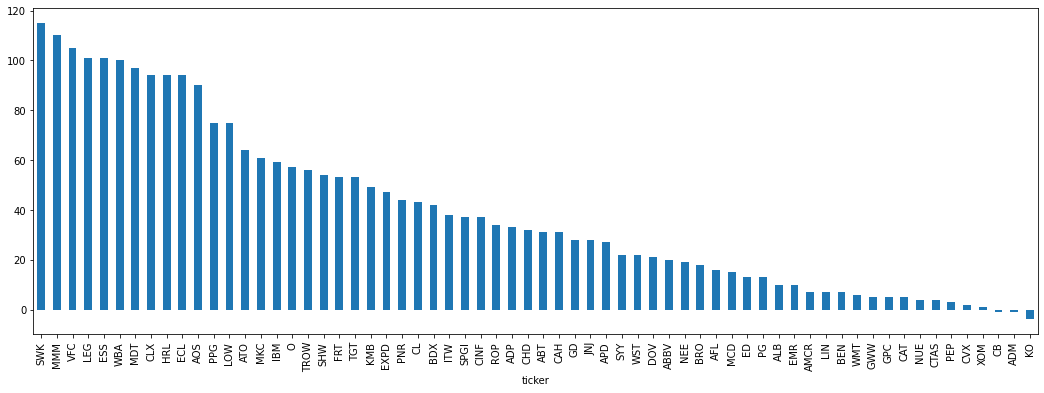

In [17]:
plt.figure(figsize=(18,6))
result['buy score'].plot(kind='bar')
plt.show()

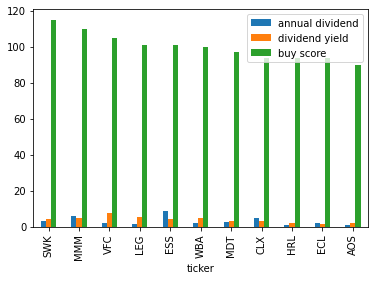

In [18]:
result[result['buy score'] > 80].plot(kind='bar')
plt.show()

"""
get basic info
"""

In [1]:
class StockBasicInfo:
    def __init__(self, ticker):
        self.stock_stats = stock_info.get_stats(ticker)

    def getRoe(self):
        return self.__getValueByAttribute('Return on Equity (ttm)')

    def getPayoutRatio(self):
        return self.__getValueByAttribute('Payout Ratio 4')

    def getDividendYield(self):
        return self.__getValueByAttribute('Forward Annual Dividend Yield 4')

    def __getValueByAttribute(self, attribute):
        try:
            stock_stats = self.stock_stats
            value = stock_stats['Value'][stock_stats['Attribute'] == attribute].values[0]
            value = value.replace('%', '')
            return float(value)
        except Exception as e:
            print(e)
            return 'N/A'

In [20]:
roes = []
payoutratios = []
for ticker in result.index:
    #print(ticker)
    stockBasicInfo = StockBasicInfo(ticker)
    roes.append(stockBasicInfo.getRoe())
    payoutratios.append(stockBasicInfo.getPayoutRatio())

In [21]:
result['roe'] = roes

In [22]:
result['payout ratio'] = payoutratios

In [23]:
result.head(3)

,annual dividend,dividend yield,buy score,roe,payout ratio
ticker,,,,,
SWK,3.20,4.30,115,5.73%,85.68%
MMM,5.96,4.96,110,45.93%,51.92%
VFC,2.04,7.51,105,12.68%,185.19%


In [24]:
from datetime import date
today = date.today().strftime("%Y%m%d")
result_file_name = STOCK_FILE_NAME.split(".")[0] + "_result_" + today + ".xlsx"
result.to_excel(result_file_name)

"""
FIN
"""